In [3]:
import pandas as pd
import numpy as np

wikipedia = pd.read_csv('./wikipedia/ml_wikipedia.csv')
print(wikipedia.shape)
wikipedia.head()

(157474, 6)


,Unnamed: 0,u,i,ts,label,idx
0,0,1,8228,0.0,0.0,1
1,1,2,8229,36.0,0.0,2
2,2,2,8229,77.0,0.0,3
3,3,3,8230,131.0,0.0,4
4,4,2,8229,150.0,0.0,5


Min timestamp: 0.0
Max timestamp: 2678373.0


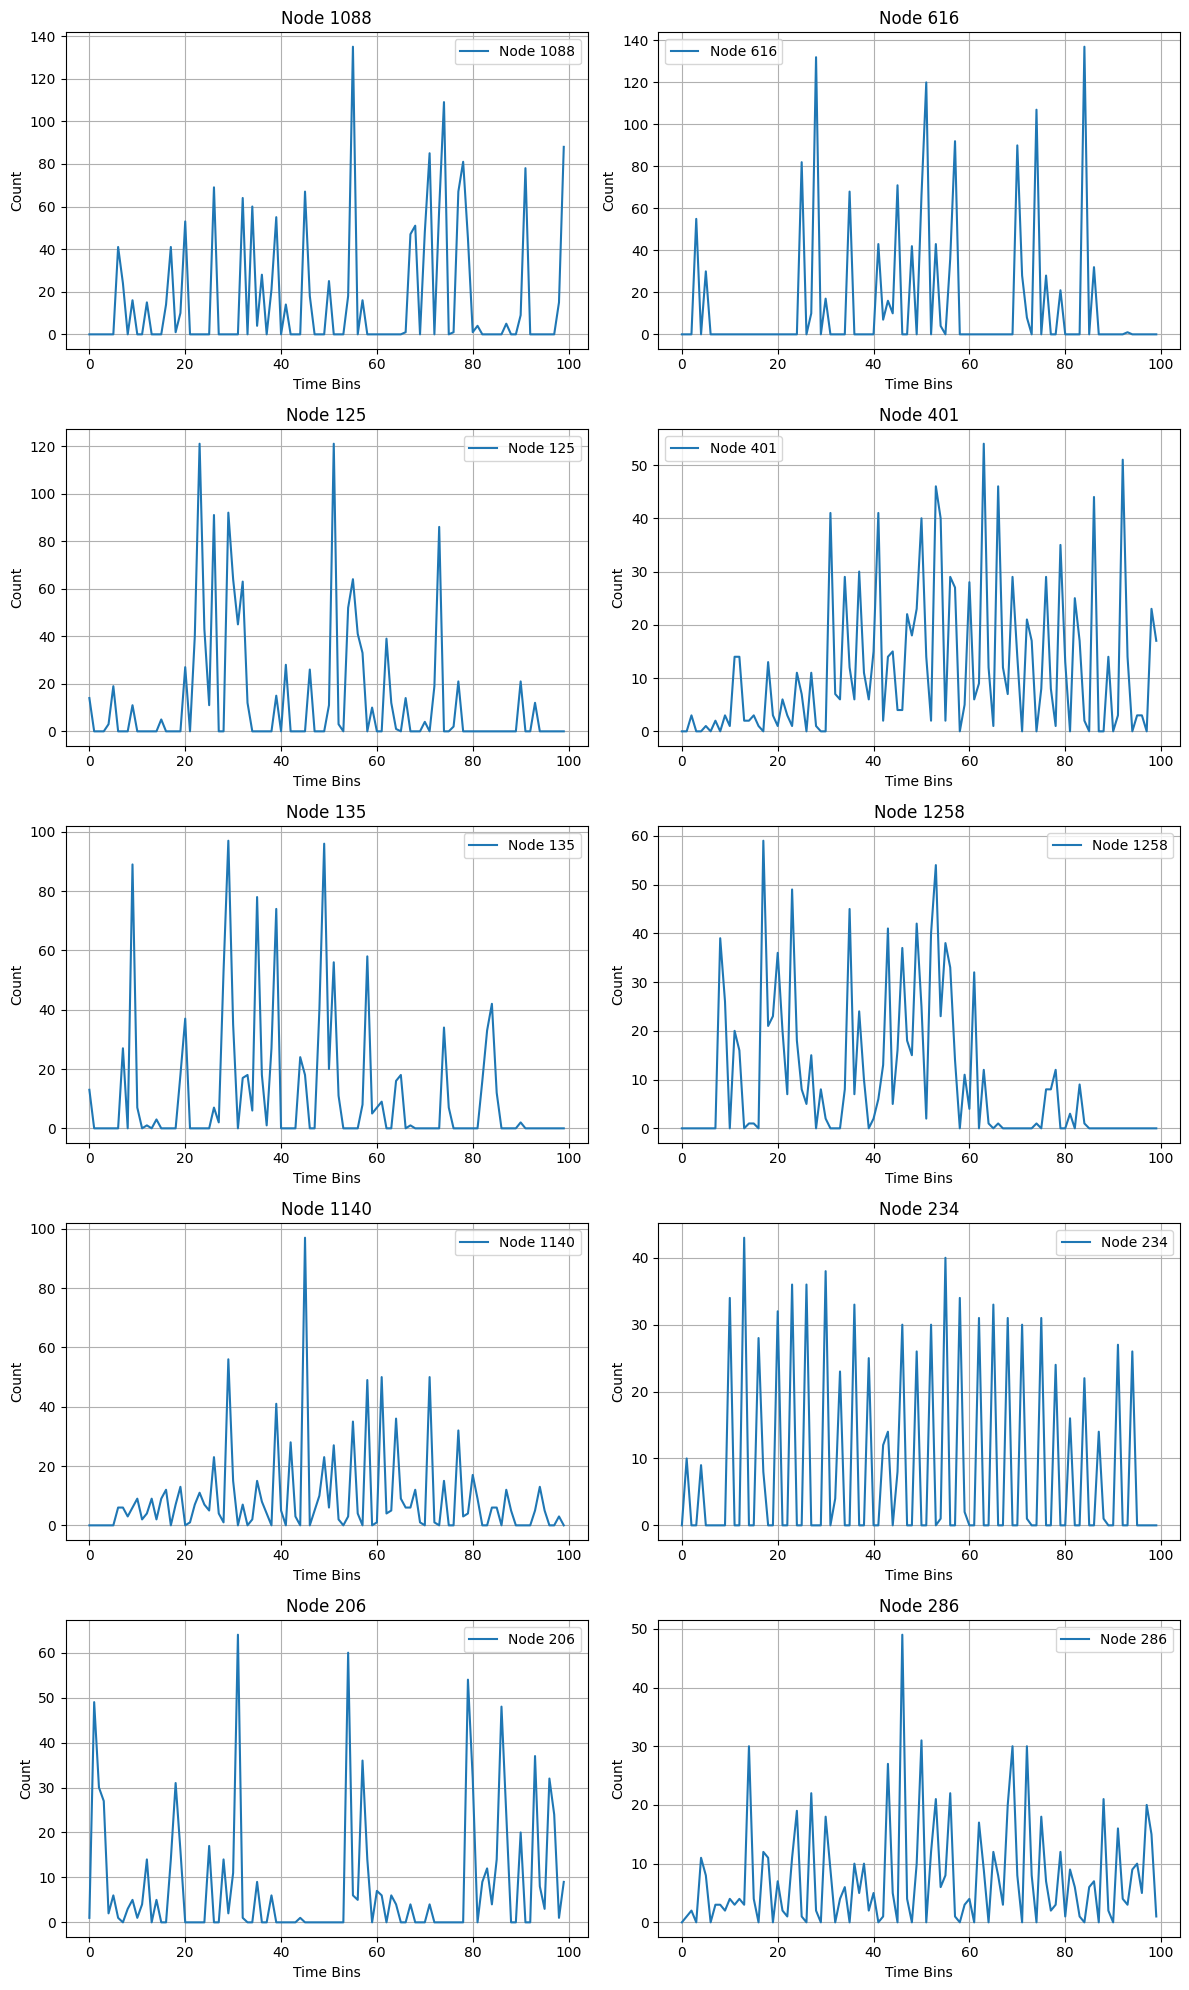

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取 CSV 文件
# df = pd.read_csv('./mooc/ml_mooc.csv')
df = pd.read_csv('./wikipedia/ml_wikipedia.csv')

# 默认参数
n = 100
k = 10

# 获取时间戳的最小值和最大值
min_ts = df['ts'].min()
max_ts = df['ts'].max()

print(f'Min timestamp: {min_ts}')
print(f'Max timestamp: {max_ts}')

# 计算时间划分的边界
bins = np.linspace(min_ts, max_ts, n + 1)

# 将时间戳划分为 n 等分
df['time_bin'] = pd.cut(df['ts'], bins=bins, labels=False, include_lowest=True)

# 计算每个节点 u 在每个时间划分中的出现次数
u_counts = df.groupby(['u', 'time_bin']).size().unstack(fill_value=0)

# 找出出现次数最多的 top k 个节点 u
top_k_u = u_counts.sum(axis=1).nlargest(k).index
# top_k_u = np.random.choice(u_counts.index, k, replace=False)

# 设置子图的行数和列数
rows = (k + 1) // 2
cols = 2

# 创建子图
fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))

# 绘制每对节点的折线图
for i in range(0, k, 2):
    row = i // 2
    col = 0
    if i < k:
        u1 = top_k_u[i]
        axes[row, col].plot(u_counts.columns, u_counts.loc[u1], label=f'Node {u1}')
        axes[row, col].set_title(f'Node {u1}')
        axes[row, col].set_xlabel('Time Bins')
        axes[row, col].set_ylabel('Count')
        axes[row, col].legend()
        axes[row, col].grid(True)
    
    col = 1
    if i + 1 < k:
        u2 = top_k_u[i + 1]
        axes[row, col].plot(u_counts.columns, u_counts.loc[u2], label=f'Node {u2}')
        axes[row, col].set_title(f'Node {u2}')
        axes[row, col].set_xlabel('Time Bins')
        axes[row, col].set_ylabel('Count')
        axes[row, col].legend()
        axes[row, col].grid(True)

# 调整子图布局
plt.tight_layout()
plt.show()


In [11]:
u_counts

time_bin,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
u,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,13,20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,26,15,6,23,8,18,18,10,0,...,0,1,0,0,0,0,0,0,0,0
5,19,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8224,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
